# Keras Model Grid Example

When training neural networks with `keras` one has to chose a network topology, i.e. the number of hidden layers and units. This choice is not always obvious and one might want to systematically try out a few. The wrapper `keras_grid` helps precisely with that.

In [2]:
import sys
sys.path.append('../')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [48]:
from keras.models import Sequential
from keras.layers import Dense
import keras_grid

# The Function & The Data Set
Assume we want to learn the function $f:\mathbb{R} \to \mathbb{R}$, $x \mapsto x^2 + \sin(x)$, on the interval $[-1, 1]$.

In [40]:
def f(x):
    return x**2 + np.sin(x)

x_plot = np.linspace(-1, 1, 1000)
y_plot = f(x_plot)

x = np.random.uniform(-1, 1, 100)
y = f(x)

<IPython.core.display.Javascript object>


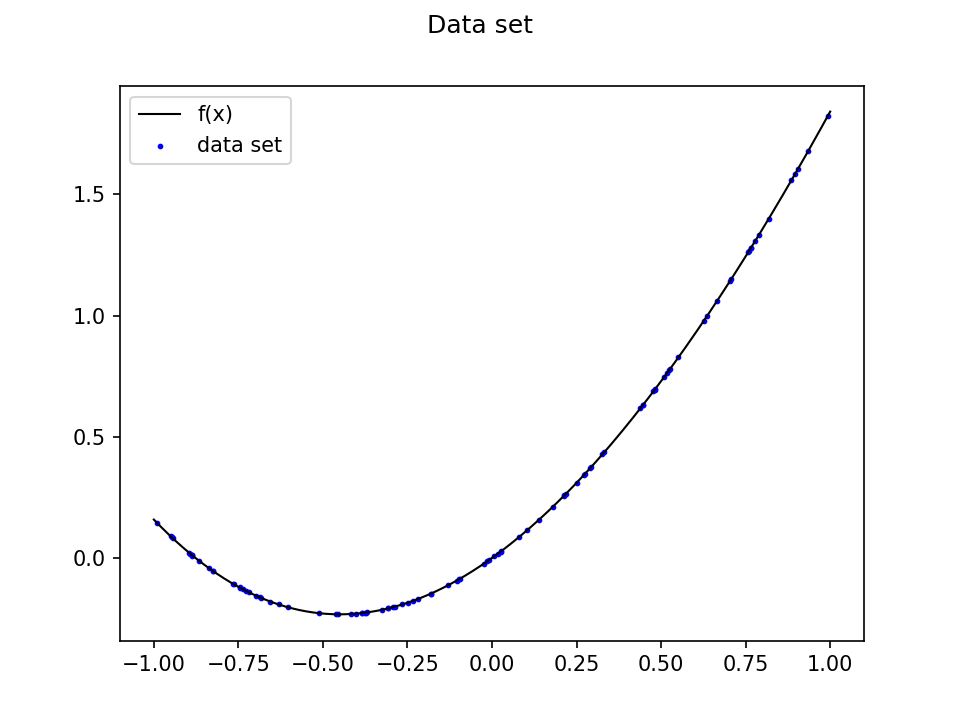

In [41]:
plt.figure()
plt.suptitle('Data set')
plt.plot(x_plot, y_plot, c='k', linewidth=1, label='f(x)')
plt.scatter(x, y, s=3, c='b', label='data set')
plt.legend()
plt.show()

# The Model Grid
We want to learn this nonlinear function $f$ by using a multilayer perceptron. The number of inputs and outputs are given as $n_i = n_o =1$, which we treat as hyperparameters of the model grid. We want to try various numbers of hidden layers, say $\mathcal{N}_L = (1, 2, 3)$ and also various numbers of units, say $\mathcal{N}_u = (64, 128)$.

In [44]:
# first step is to create a class for this grid of multilayer perceptrons

class MlpGrid(keras_grid.ModelGrid):
    """
    Grid of multilayer perceptrons parameterized by a list for the number of hidden layers 
    and a second list for the number of units. The number of inputs and outputs is stored as a
    hyperparameters.
    """
    
    def _create_model(self, key):
        num_inputs = self.hyperparameter_dict['num_inputs']
        num_outputs = self.hyperparameter_dict['num_outputs']
        num_layers, num_units = self.parameter_dict[key]        
        model = Sequential()
        model.add(Dense(units=num_units, input_shape=(num_inputs,), activation='sigmoid'))
        for layer in range(1, num_layers - 1):
            model.add(Dense(units=num_units, activation='sigmoid'))
        model.add(Dense(units=num_outputs, activation='linear'))
        return model

In [72]:
# second step is to instantiate this class with the desired parameter lists

range_hidden_layers = np.array([1, 2, 3])
range_units = np.array([16, 32, 64, 128])

mlp_grid = MlpGrid.from_param_list(param_list = [range_hidden_layers, range_units],
                                  hyperparameter_dict={'num_inputs': 1,
                                                       'num_outputs': 1})


In [73]:
mlp_grid.initialize() # creates all the keras models in the grid

In [74]:
mlp_grid[0,1].summary() # access single model in grids by indices
# this model has range_hidden_layers[0] number of hidden layers and range_units[1] number of units in it

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


# Compilation & Training

In [75]:
# mlp_grid can now be used like any keras model

mlp_grid.compile(optimizer='Adam', loss='mse', metrics=['mse', 'mae']) 

# ==> all models in the grid are compiled with consistent settings

In [76]:
mlp_grid.fit(x=x, y=y, shuffle=True, validation_split=0.2, epochs=20)

Fitting with key 0_0 
Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 1s 10ms/step - loss: 1.6283 - mean_squared_error: 1.6283 - mean_absolute_error: 1.1555 - val_loss: 1.6273 - val_mean_squared_error: 1.6273 - val_mean_absolute_error: 1.1508
Epoch 2/20
80/80 [==============================] - 0s 50us/step - loss: 1.5574 - mean_squared_error: 1.5574 - mean_absolute_error: 1.1251 - val_loss: 1.5572 - val_mean_squared_error: 1.5572 - val_mean_absolute_error: 1.1207
Epoch 3/20
80/80 [==============================] - 0s 50us/step - loss: 1.4885 - mean_squared_error: 1.4885 - mean_absolute_error: 1.0950 - val_loss: 1.4892 - val_mean_squared_error: 1.4892 - val_mean_absolute_error: 1.0907
Epoch 4/20
80/80 [==============================] - 0s 62us/step - loss: 1.4233 - mean_squared_error: 1.4233 - mean_absolute_error: 1.0652 - val_loss: 1.4230 - val_mean_squared_error: 1.4230 - val_mean_absolute_error: 1.0608
Epoch 5/20
80/80 [================

Epoch 17/20
80/80 [==============================] - 0s 50us/step - loss: 0.3214 - mean_squared_error: 0.3214 - mean_absolute_error: 0.4567 - val_loss: 0.3349 - val_mean_squared_error: 0.3349 - val_mean_absolute_error: 0.5141
Epoch 18/20
80/80 [==============================] - 0s 37us/step - loss: 0.3175 - mean_squared_error: 0.3175 - mean_absolute_error: 0.4529 - val_loss: 0.3306 - val_mean_squared_error: 0.3306 - val_mean_absolute_error: 0.5105
Epoch 19/20
80/80 [==============================] - 0s 38us/step - loss: 0.3136 - mean_squared_error: 0.3136 - mean_absolute_error: 0.4500 - val_loss: 0.3259 - val_mean_squared_error: 0.3259 - val_mean_absolute_error: 0.5085
Epoch 20/20
80/80 [==============================] - 0s 38us/step - loss: 0.3094 - mean_squared_error: 0.3094 - mean_absolute_error: 0.4481 - val_loss: 0.3214 - val_mean_squared_error: 0.3214 - val_mean_absolute_error: 0.5067
Fitting with key 0_2 
Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [============

Epoch 13/20
80/80 [==============================] - 0s 37us/step - loss: 0.2454 - mean_squared_error: 0.2454 - mean_absolute_error: 0.3923 - val_loss: 0.2495 - val_mean_squared_error: 0.2495 - val_mean_absolute_error: 0.4371
Epoch 14/20
80/80 [==============================] - 0s 37us/step - loss: 0.2434 - mean_squared_error: 0.2434 - mean_absolute_error: 0.3812 - val_loss: 0.2458 - val_mean_squared_error: 0.2458 - val_mean_absolute_error: 0.4248
Epoch 15/20
80/80 [==============================] - 0s 50us/step - loss: 0.2379 - mean_squared_error: 0.2379 - mean_absolute_error: 0.3727 - val_loss: 0.2380 - val_mean_squared_error: 0.2380 - val_mean_absolute_error: 0.4268
Epoch 16/20
80/80 [==============================] - 0s 37us/step - loss: 0.2314 - mean_squared_error: 0.2314 - mean_absolute_error: 0.3763 - val_loss: 0.2318 - val_mean_squared_error: 0.2318 - val_mean_absolute_error: 0.4285
Epoch 17/20
80/80 [==============================] - 0s 37us/step - loss: 0.2274 - mean_squared_

Epoch 9/20
80/80 [==============================] - 0s 37us/step - loss: 0.2428 - mean_squared_error: 0.2428 - mean_absolute_error: 0.3851 - val_loss: 0.2461 - val_mean_squared_error: 0.2461 - val_mean_absolute_error: 0.4384
Epoch 10/20
80/80 [==============================] - 0s 37us/step - loss: 0.2394 - mean_squared_error: 0.2394 - mean_absolute_error: 0.3853 - val_loss: 0.2422 - val_mean_squared_error: 0.2422 - val_mean_absolute_error: 0.4369
Epoch 11/20
80/80 [==============================] - 0s 50us/step - loss: 0.2359 - mean_squared_error: 0.2359 - mean_absolute_error: 0.3836 - val_loss: 0.2385 - val_mean_squared_error: 0.2385 - val_mean_absolute_error: 0.4339
Epoch 12/20
80/80 [==============================] - 0s 63us/step - loss: 0.2330 - mean_squared_error: 0.2330 - mean_absolute_error: 0.3814 - val_loss: 0.2347 - val_mean_squared_error: 0.2347 - val_mean_absolute_error: 0.4310
Epoch 13/20
80/80 [==============================] - 0s 38us/step - loss: 0.2299 - mean_squared_e

Epoch 5/20
80/80 [==============================] - 0s 75us/step - loss: 0.5429 - mean_squared_error: 0.5429 - mean_absolute_error: 0.5252 - val_loss: 0.4464 - val_mean_squared_error: 0.4464 - val_mean_absolute_error: 0.4504
Epoch 6/20
80/80 [==============================] - 0s 50us/step - loss: 0.3895 - mean_squared_error: 0.3895 - mean_absolute_error: 0.4062 - val_loss: 0.3368 - val_mean_squared_error: 0.3368 - val_mean_absolute_error: 0.4219
Epoch 7/20
80/80 [==============================] - 0s 50us/step - loss: 0.3032 - mean_squared_error: 0.3032 - mean_absolute_error: 0.3697 - val_loss: 0.2799 - val_mean_squared_error: 0.2799 - val_mean_absolute_error: 0.4303
Epoch 8/20
80/80 [==============================] - 0s 62us/step - loss: 0.2607 - mean_squared_error: 0.2607 - mean_absolute_error: 0.3795 - val_loss: 0.2598 - val_mean_squared_error: 0.2598 - val_mean_absolute_error: 0.4536
Epoch 9/20
80/80 [==============================] - 0s 50us/step - loss: 0.2544 - mean_squared_error

Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4122 - mean_squared_error: 0.4122 - mean_absolute_error: 0.4115 - val_loss: 0.3802 - val_mean_squared_error: 0.3802 - val_mean_absolute_error: 0.4467
Epoch 2/20
80/80 [==============================] - 0s 50us/step - loss: 0.3422 - mean_squared_error: 0.3422 - mean_absolute_error: 0.3941 - val_loss: 0.3285 - val_mean_squared_error: 0.3285 - val_mean_absolute_error: 0.4651
Epoch 3/20
80/80 [==============================] - 0s 62us/step - loss: 0.3060 - mean_squared_error: 0.3060 - mean_absolute_error: 0.4112 - val_loss: 0.3065 - val_mean_squared_error: 0.3065 - val_mean_absolute_error: 0.4857
Epoch 4/20
80/80 [==============================] - 0s 37us/step - loss: 0.2869 - mean_squared_error: 0.2869 - mean_absolute_error: 0.4301 - val_loss: 0.3039 - val_mean_squared_error: 0.3039 - val_mean_absolute_error: 0.5059
Epoch 5/20
80/80 [==============================] - 0s 37

Epoch 17/20
80/80 [==============================] - 0s 74us/step - loss: 0.2765 - mean_squared_error: 0.2765 - mean_absolute_error: 0.4302 - val_loss: 0.2834 - val_mean_squared_error: 0.2834 - val_mean_absolute_error: 0.4777
Epoch 18/20
80/80 [==============================] - 0s 62us/step - loss: 0.2724 - mean_squared_error: 0.2724 - mean_absolute_error: 0.4184 - val_loss: 0.2814 - val_mean_squared_error: 0.2814 - val_mean_absolute_error: 0.4670
Epoch 19/20
80/80 [==============================] - 0s 62us/step - loss: 0.2706 - mean_squared_error: 0.2706 - mean_absolute_error: 0.4107 - val_loss: 0.2789 - val_mean_squared_error: 0.2789 - val_mean_absolute_error: 0.4616
Epoch 20/20
80/80 [==============================] - 0s 75us/step - loss: 0.2681 - mean_squared_error: 0.2681 - mean_absolute_error: 0.4036 - val_loss: 0.2759 - val_mean_squared_error: 0.2759 - val_mean_absolute_error: 0.4579
Fitting with key 2_3 
Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [============

<IPython.core.display.Javascript object>


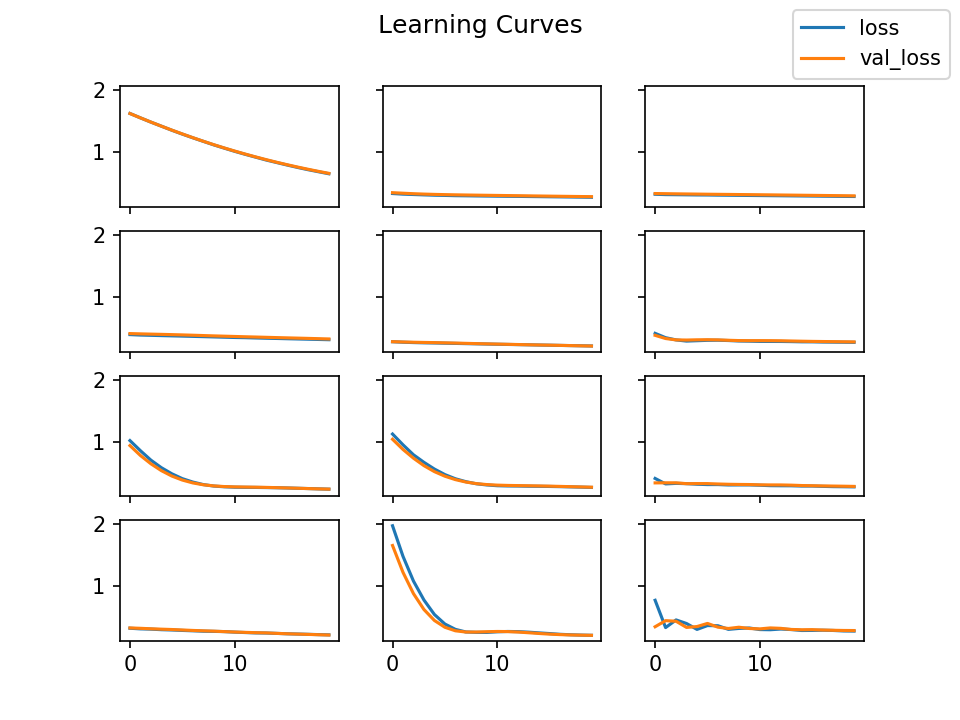

In [78]:
# consistently plot learning curves

fig, axes = plt.subplots(nrows = range_units.shape[0], ncols = range_hidden_layers.shape[0], sharex=True, sharey=True)

fig.suptitle('Learning Curves')

for key in mlp_grid.parameter_dict:
    num_layers_idx, num_units_idx = key
    axes[num_units_idx][num_layers_idx].plot(mlp_grid.history[num_layers_idx, num_units_idx]['loss'], label='loss')
    axes[num_units_idx][num_layers_idx].plot(mlp_grid.history[num_layers_idx, num_units_idx]['val_loss'], label='val_loss')
    
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

We see that model `(1,0)`, i.e. with `range_units[1] == 32` units and `range_hidden_layers[0] == 1` hidden layers already achieves decent results.

# Predictions